In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
sns.set_style("dark")
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

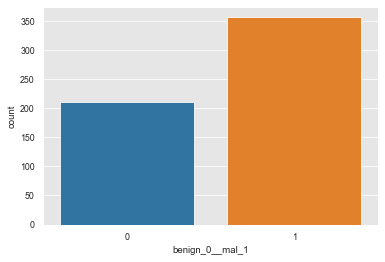

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

In [11]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [19]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().iplot(kind='bar')

<Figure size 864x432 with 0 Axes>

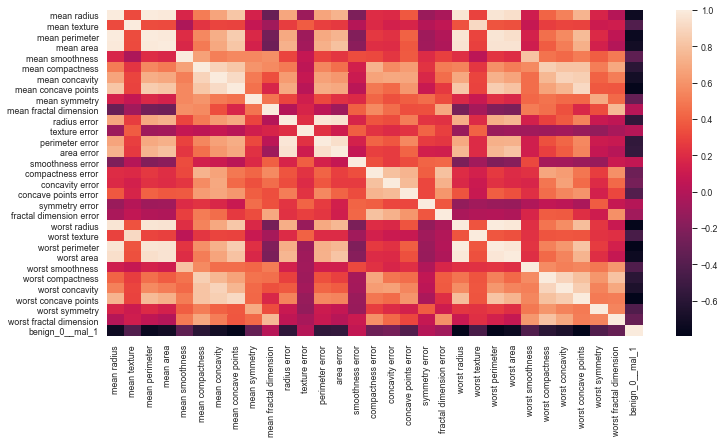

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
X_train.max()

1.0

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [38]:
X_train.shape

(426, 30)

In [41]:
# Create empty sequential models
model = Sequential()

# Add layers - We added 30 because number of vaiables in trained data set
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output layer - BINARY classification, so we chose sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

# Compiling model - We use these optimizer and loss because we are solving a regression problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [42]:
# No Batch Size
# Epochs - Number of iterations
# Using validation data here to prevent overfitting
# Adding validation data has no impact in adjusting weights and biases
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 23ms/step - loss: 0.6812 - val_loss: 0.6516
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6409 - val_loss: 0.6137
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5965 - val_loss: 0.5711
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5468 - val_loss: 0.5224
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5122 - val_loss: 0.4725
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4562 - val_loss: 0.4232
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4290 - val_loss: 0.3826
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3729 - val_loss: 0.3444
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3295 - val_loss: 0.3139
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3160 - val_loss: 0.2848
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0442 - val_loss: 0.1036
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.0999
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0998
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0511 - val_loss: 0.1021
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0644 - val_loss: 0.0976
Epoch 88/600
14/14 [==============================] - 0s 36ms/step - loss: 0.0555 - val_loss: 0.1024
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0436 - val_loss: 0.1074
Epoch 90/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0492 - val_loss: 0.1006
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0569 - val_loss: 0.1100
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0412 - val_loss: 0.101

14/14 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.1162
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.1171
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0464 - val_loss: 0.1172
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0358 - val_loss: 0.1143
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0409 - val_loss: 0.1099
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0365 - val_loss: 0.1139
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.1118
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.1202
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0477 - val_loss: 0.1117
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0328 - val_loss: 0.1147
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1188
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.1210
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.1203
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.1195
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.1189
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.1155
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.1204
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1211
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.1229
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.1165
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.1277
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.1222
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0218 - val_loss: 0.1237
Epoch 329/600
14/14 [==============================] - 0s 28ms/step - loss: 0.0215 - val_loss: 0.1279
Epoch 330/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.1246
Epoch 331/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0188 - val_loss: 0.1251
Epoch 332/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0277 - val_loss: 0.1245
Epoch 333/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0168 - val_loss: 0.1233
Epoch 334/600
14/14 [==============================] - 0s 31ms/step - loss: 0.0189 - val_loss: 0.1274
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.123

14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1627
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0122 - val_loss: 0.1633
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.1725
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.1680
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 0.1582
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.1641
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0142 - val_loss: 0.1552
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.1575
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.1624
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.1706
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.2109
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.2238
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.2236
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.2157
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0159 - val_loss: 0.2370
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.2157
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.2014
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.2019
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.2147
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.2262
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.2769
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.2894
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.2876
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.2876
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.2986
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.2955
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.2928
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0111 - val_loss: 0.3017
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.2934
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0103 - val_loss: 0.2968
Epoc

In [43]:
losses = pd.DataFrame(model.history.history)

In [44]:
losses.iplot()

In [45]:
# the above is a great example of overfitting where loss in training dataset is going down while loss in validation dataset is going up

In [46]:
# Create empty sequential models
model = Sequential()

# Add layers - We added 30 because number of vaiables in trained data set
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output layer - BINARY classification, so we chose sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

# Compiling model - We use these optimizer and loss because we are solving a regression problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
# We choose min as the mode since we are trying to minimize the loss which is the value we are monitoring
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [50]:
# No Batch Size
# Epochs - Number of iterations
# Using validation data here to prevent overfitting
# Adding validation data has no impact in adjusting weights and biases
# Adding callback parameter
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.7152 - val_loss: 0.6799
Epoch 2/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6732 - val_loss: 0.6473
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6400 - val_loss: 0.6187
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6116 - val_loss: 0.5844
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5788 - val_loss: 0.5412
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5362 - val_loss: 0.4927
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4815 - val_loss: 0.4424
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4308 - val_loss: 0.3944
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3925 - val_loss: 0.3524
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3404 - val_loss: 0.3145
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0386 - val_loss: 0.1072
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0646 - val_loss: 0.1035
Epoch 85/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0670 - val_loss: 0.1051
Epoch 00085: early stopping


In [51]:
losses = pd.DataFrame(model.history.history)

In [52]:
losses.iplot()

In [53]:
# Add dropout layer to prevent overfitting

In [54]:
# Create empty sequential models
model = Sequential()

# Add layers - We added 30 because number of vaiables in trained data set
model.add(Dense(30,activation='relu'))
# Rate at which neurons will be dropped out
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Output layer - BINARY classification, so we chose sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

# Compiling model - We use these optimizer and loss because we are solving a regression problem
model.compile(optimizer='adam',loss='binary_crossentropy')

In [55]:
# No Batch Size
# Epochs - Number of iterations
# Using validation data here to prevent overfitting
# Adding validation data has no impact in adjusting weights and biases
# Adding callback parameter
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6915 - val_loss: 0.6761
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6837 - val_loss: 0.6631
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6668 - val_loss: 0.6475
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6509 - val_loss: 0.6278
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6305 - val_loss: 0.6037
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6149 - val_loss: 0.5757
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6102 - val_loss: 0.5471
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5659 - val_loss: 0.5124
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5356 - val_loss: 0.4751
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5222 - val_loss: 0.4480
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.1553 - val_loss: 0.0851
Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1444 - val_loss: 0.0840
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1481 - val_loss: 0.0817
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1295 - val_loss: 0.0811
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1072 - val_loss: 0.0989
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1275 - val_loss: 0.0853
Epoch 88/600
14/14 [==============================] - 0s 16ms/step - loss: 0.1447 - val_loss: 0.0776
Epoch 89/600
14/14 [==============================] - 0s 17ms/step - loss: 0.1885 - val_loss: 0.0828
Epoch 90/600
14/14 [==============================] - 0s 16ms/step - loss: 0.1096 - val_loss: 0.0771
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1610 - val_loss: 0.0877
Epoch 92/6

Epoch 163/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0992 - val_loss: 0.0731
Epoch 164/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1181 - val_loss: 0.0817
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1164 - val_loss: 0.0738
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1048 - val_loss: 0.0803
Epoch 167/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0966 - val_loss: 0.0765
Epoch 00167: early stopping


In [56]:
losses = pd.DataFrame(model.history.history)

In [57]:
losses.iplot()

In [59]:
predictions = model.predict_classes(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [62]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
